<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/RF_datos_silice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
## preidccion numeria (regresion) para un dataset de industria minera
# usaremos un dataset clásico y muy real en minería: "Mining Process Flotation Plant".
# El objetivo es predecir el % de Sílice en el concentrado de hierro, algo crítico para la calidad del producto final.

## Paso 1: Localizar y Descargar el Dataset
import pandas as pd
import kagglehub
import os

# 1. Descargamos el dataset específico de la planta de flotación
path = kagglehub.dataset_download("edumagalhaes/quality-prediction-in-a-mining-process")

# 2. Localizamos el archivo CSV
archivos = os.listdir(path)
csv_file = [f for f in archivos if f.endswith('.csv')][0]
full_path = os.path.join(path, csv_file)

# 3. Cargamos los datos
df_mineria = pd.read_csv(full_path)
df_mineria.head()

# 4. Limpieza inicial: En este dataset las decimales a veces vienen con coma ','
# y Python necesita punto '.'. Además, lo convertimos a números.
df_mineria = df_mineria.replace(',', '.', regex=True).apply(pd.to_numeric, errors='ignore')

# Mostramos las primeras filas
df_mineria.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [13]:
## Limpieza de datos
# 1. Eliminamos las columnas solo si existen
# Quitamos 'date' (que sí está) e intentamos con 'index' por si acaso
cols_a_eliminar = ['index', 'date']
df_mineria_limpio = df_mineria.drop(columns=cols_a_eliminar, errors='ignore')

# 2. Verificamos nulos (importante en sensores mineros)
print(f"Valores nulos totales: {df_mineria_limpio.isnull().sum().sum()}")

# 3. Definimos X e y
# Nota: Asegúrate de que los nombres coincidan exactamente con tu dataset
X = df_mineria_limpio.drop(columns=['% Silica Concentrate', '% Iron Concentrate'], errors='ignore')
y = df_mineria_limpio['% Silica Concentrate']

print(f"\n✅ Dataset listo.")
print(f"Variables predictoras (X): {X.shape[1]}")
print(f"Registros totales: {len(X)}")


✅ Dataset listo.
Variables predictoras (X): 21
Registros totales: 737453


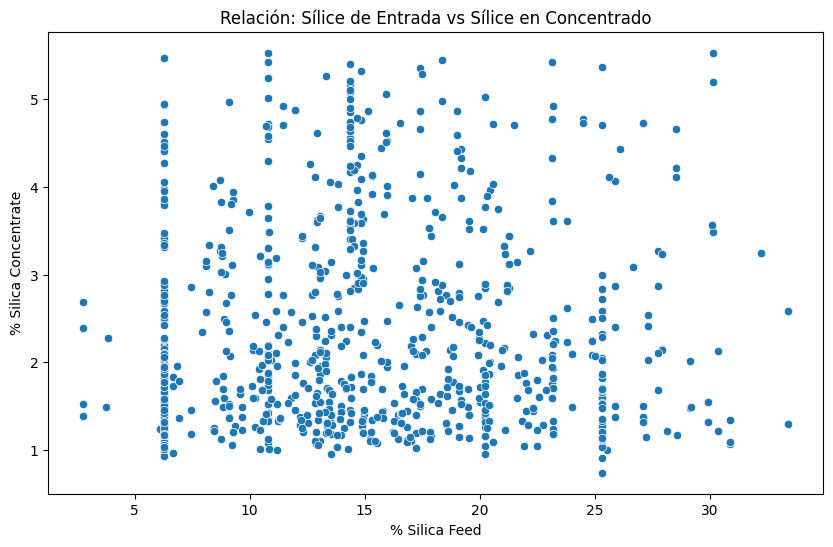

In [14]:
## EDA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='% Silica Feed', y='% Silica Concentrate', data=df_mineria.sample(1000))
plt.title('Relación: Sílice de Entrada vs Sílice en Concentrado')
plt.show()


In [19]:
## escalar los datos

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Dividimos los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Creamos el escalador y lo aplicamos
scaler = StandardScaler()

# OJO: Solo ajustamos el escalador con los datos de entrenamiento (X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("¡Datos normalizados y listos para la regresión!")

¡Datos normalizados y listos para la regresión!


In [25]:
## Entrenamiento del modelo - Randon Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Creamos el modelo de Regresión (con pocos árboles para que sea rápido)
modelo_minero = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)

# 2. Entrenamos (Usamos los datos escalados que preparamos antes)
modelo_minero.fit(X_train_scaled, y_train)

# 3. Predecimos y evaluamos
predicciones_mineras = modelo_minero.predict(X_test_scaled)

# Metricas clave para Regresión
mae = mean_absolute_error(y_test, predicciones_mineras)
r2 = r2_score(y_test, predicciones_mineras)

print(f"Error Medio Absoluto (MAE): {mae:.4f} % de Sílice")
print(f"Precisión del modelo (R² Score): {r2:.4f}")

## usando una muestra de la data para correr el modelo
# 1. Tomamos una muestra aleatoria para trabajar rápido
# 50,000 filas es más que suficiente para un primer prototipo
df_muestra = df_mineria_limpio.sample(n=50000, random_state=42)

# 2. Definimos X e y de la muestra
X_m = df_muestra.drop(columns=['% Silica Concentrate', '% Iron Concentrate'], errors='ignore')
y_m = df_muestra['% Silica Concentrate']

# 3. Dividimos y Escalamos (como antes, pero con la muestra)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled_m = scaler.fit_transform(X_train_m)
X_test_scaled_m = scaler.transform(X_test_m)

# 4. Entrenamos el modelo (esto debería tardar solo unos segundos ahora)
modelo_minero = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
modelo_minero.fit(X_train_scaled_m, y_train_m)

# 5. Evaluamos
predicciones = modelo_minero.predict(X_test_scaled_m)
print(f"Error Medio (MAE): {mean_absolute_error(y_test_m, predicciones):.4f}")
print(f"Precisión (R2): {r2_score(y_test_m, predicciones):.4f}")

Error Medio (MAE): 0.3746
Precisión (R2): 0.7459


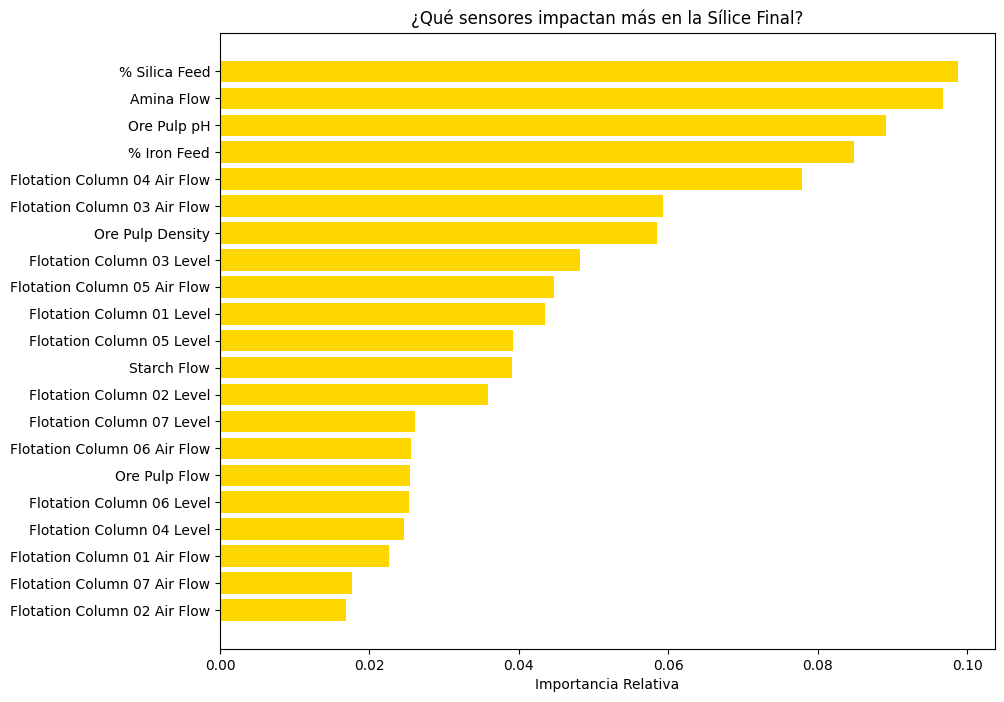

In [27]:
## analisis de variables y si implicancia
import numpy as np

# Extraemos la importancia de los sensores
importancias = modelo_minero.feature_importances_
indices = np.argsort(importancias)

plt.figure(figsize=(10, 8))
plt.title('¿Qué sensores impactan más en la Sílice Final?')
plt.barh(range(len(indices)), importancias[indices], color='gold', align='center')
plt.yticks(range(len(indices)), [X_m.columns[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

In [30]:
## simulador de planta
def simulador_mineria(silica_feed, amina_flow, ph, iron_feed, air_col_04):
    # 1. Creamos un array con valores promedio para los otros sensores (simplificado)
    # En un caso real, usaríamos los valores actuales de los sensores en tiempo real
    base_datos = np.zeros((1, X_m.shape[1]))
    df_sim = pd.DataFrame(base_datos, columns=X_m.columns)

    # 2. Insertamos tus variables de interés
    df_sim['% Silica Feed'] = silica_feed
    df_sim['Amina Flow'] = amina_flow
    df_sim['Ore Pulp pH'] = ph
    df_sim['% Iron Feed'] = iron_feed
    df_sim['Flotation Column 04 Air Flow'] = air_col_04

    # 3. Escalamos y predecimos
    datos_scaled = scaler.transform(df_sim)
    pred = modelo_minero.predict(datos_scaled)[0]

    print(f"--- Resultado de Simulación ---")
    print(f"Predicción de Sílice en Concentrado: {pred:.3f} %")

# PRUEBA AQUÍ: silica_feed=20, amina=500, ph=10, iron=55, air=295
simulador_mineria(20, 500, 10, 55, 295)



--- Resultado de Simulación ---
Predicción de Sílice en Concentrado: 3.724 %


In [37]:
## optimizador del proceso
def optimizador_proceso(silica_entrada, ph_objetivo):
    mejores_resultados = []
    rango_amina = np.linspace(300, 700, 10)
    rango_aire = np.linspace(200, 350, 5)

    for amina in rango_amina:
        for aire in rango_aire:
            df_opt = pd.DataFrame(np.zeros((1, X_m.shape[1])), columns=X_m.columns)
            df_opt['% Silica Feed'] = silica_entrada
            df_opt['Amina Flow'] = amina
            df_opt['Ore Pulp pH'] = ph_objetivo
            df_opt['Flotation Column 04 Air Flow'] = aire

            input_scaled = scaler.transform(df_opt)
            silica_result = modelo_minero.predict(input_scaled)[0]
            mejores_resultados.append({'Amina': amina, 'Aire': aire, 'Silica_Final': silica_result})

    df_res = pd.DataFrame(mejores_resultados) # Creamos el DataFrame
    optimo = df_res.loc[df_res['Silica_Final'].idxmin()]

    print(f"--- CONFIGURACIÓN ÓPTIMA ENCONTRADA ---")
    print(f"📉 Sílice Final Estimada: {optimo['Silica_Final']:.3f}%")

    return df_res  # <--- ESTO ES LO IMPORTANTE: Enviamos los datos hacia afuera

# Llamamos a la función y GUARDAMOS el resultado en 'df_resultados'
df_resultados = optimizador_proceso(silica_entrada=20, ph_objetivo=10)

--- CONFIGURACIÓN ÓPTIMA ENCONTRADA ---
📉 Sílice Final Estimada: 3.920%


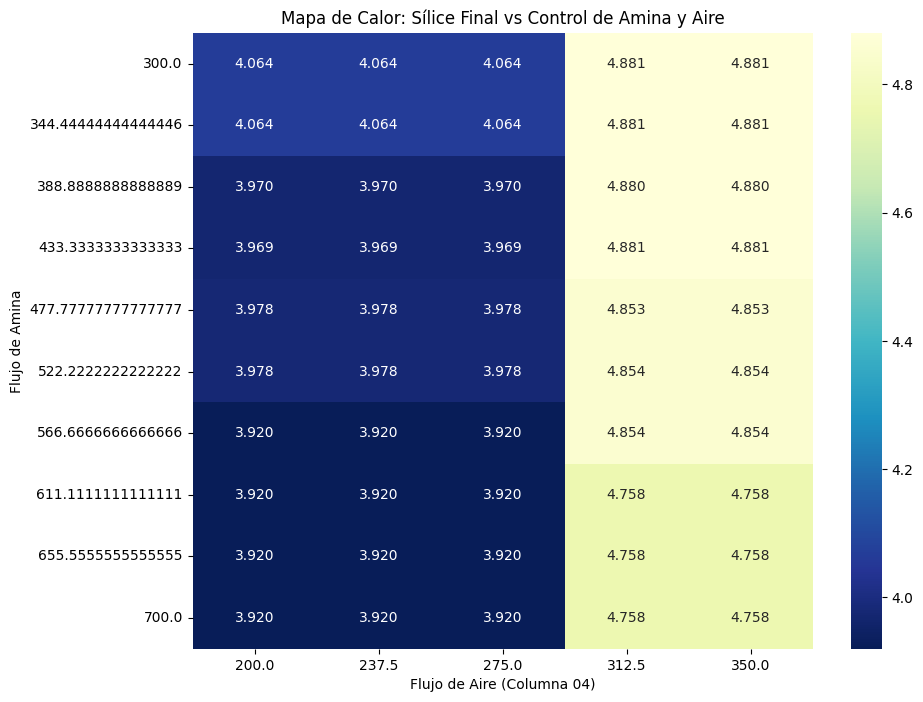

In [38]:
## mapa de calor de la optimizacion
import seaborn as sns

# 1. Preparamos los datos del optimizador para el mapa de calor
# (Usaremos los resultados que generamos en el paso anterior)
pivot_table = df_resultados.pivot(index='Amina', columns='Aire', values='Silica_Final')

# 2. Creamos el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu_r")
plt.title('Mapa de Calor: Sílice Final vs Control de Amina y Aire')
plt.xlabel('Flujo de Aire (Columna 04)')
plt.ylabel('Flujo de Amina')
plt.show()